In [1]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()

In [3]:
def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)

    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)

    return matrix

In [4]:
def simplest_cb(img, percent):
    assert img.shape[2] == 3
    assert percent > 0 and percent < 100

    half_percent = percent / 200.0

    channels = cv2.split(img)

    out_channels = []
    for channel in channels:
        assert len(channel.shape) == 2
        # find the low and high precentile values (based on the input percentile)
        height, width = channel.shape
        vec_size = width * height
        flat = channel.reshape(vec_size)

        assert len(flat.shape) == 1

        flat = np.sort(flat)

        n_cols = flat.shape[0]
        print(flat.shape)
        print(n_cols)

        low_val  = flat[math.floor(n_cols * half_percent)]
        high_val = flat[math.ceil( n_cols * (1.0 - half_percent))]

        print ("Lowval: ", low_val)
        print ("Highval: ", high_val)

        # saturate below the low percentile and above the high percentile
        thresholded = apply_threshold(channel, low_val, high_val)
        # scale the channel
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        out_channels.append(normalized)

    return cv2.merge(out_channels)

In [5]:
img = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/691.png')
reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
RGB_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100,200)




(11808768,)
11808768
Lowval:  36
Highval:  157
(11808768,)
11808768
Lowval:  34
Highval:  161
(11808768,)
11808768
Lowval:  31
Highval:  164


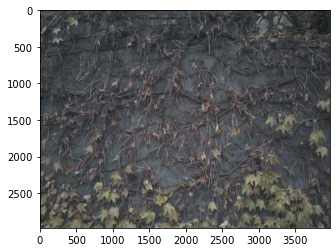

In [6]:
plt.imshow(RGB_img)

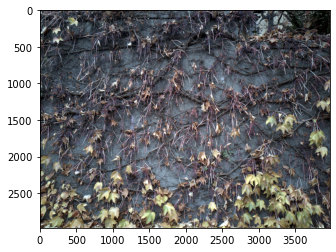

In [7]:
plt.imshow(RGB_out)

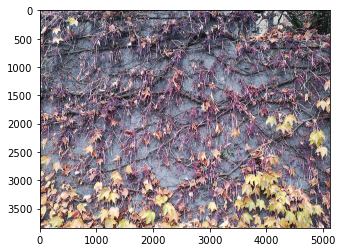

In [8]:
plt.imshow(RGB_reference)

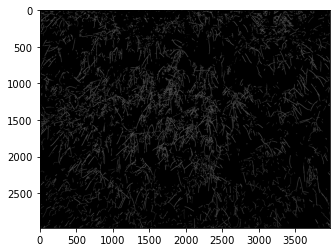

In [9]:
plt.imshow(canny, 'gray')

In [10]:
img = cv2.imread('landscape/00000116_(4).jpg')
#reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 200,400)
#RGB_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

(1625600,)
1625600
Lowval:  0
Highval:  248
(1625600,)
1625600
Lowval:  2
Highval:  254
(1625600,)
1625600
Lowval:  0
Highval:  253


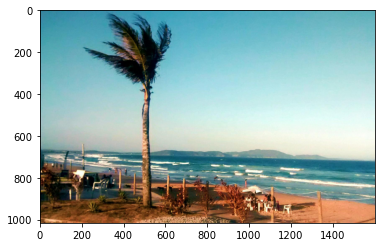

In [11]:
plt.imshow(RGB_src)

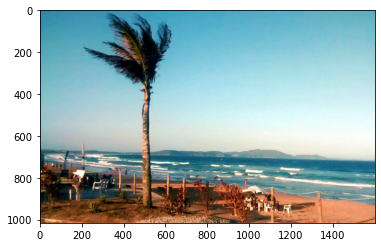

In [12]:
plt.imshow(RGB_out)

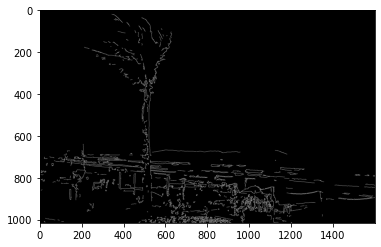

In [13]:
plt.imshow(canny, 'gray')

In [14]:
mask = np.zeros(img.shape[:2], np.uint8)

In [15]:
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

In [16]:
rect = (5,75,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[5.55275260e-01, 1.53480173e-01, 2.31084136e-02, 2.11632295e-01,
         5.65038588e-02, 2.02451470e+02, 1.90970013e+02, 1.21066799e+02,
         1.75786083e+02, 1.55136731e+02, 6.82804241e+01, 7.64779442e+01,
         7.38962970e+01, 4.86227236e+01, 1.96467654e+02, 1.75325829e+02,
         8.53133893e+01, 1.56448279e+02, 1.31227367e+02, 6.46916998e+01,
         1.13463035e+02, 1.05626282e+02, 1.30836076e+02, 1.05626282e+02,
         1.08988170e+02, 1.43907744e+02, 1.30836076e+02, 1.43907744e+02,
         2.45384832e+02, 3.48145226e+01, 4.13891285e+01, 5.00460493e+01,
         4.13891285e+01, 7.76679620e+01, 8.51570508e+01, 5.00460493e+01,
         8.51570508e+01, 1.07020620e+02, 2.50621066e+03, 2.14514962e+03,
         1.60141990e+03, 2.14514962e+03, 2.1

In [17]:
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

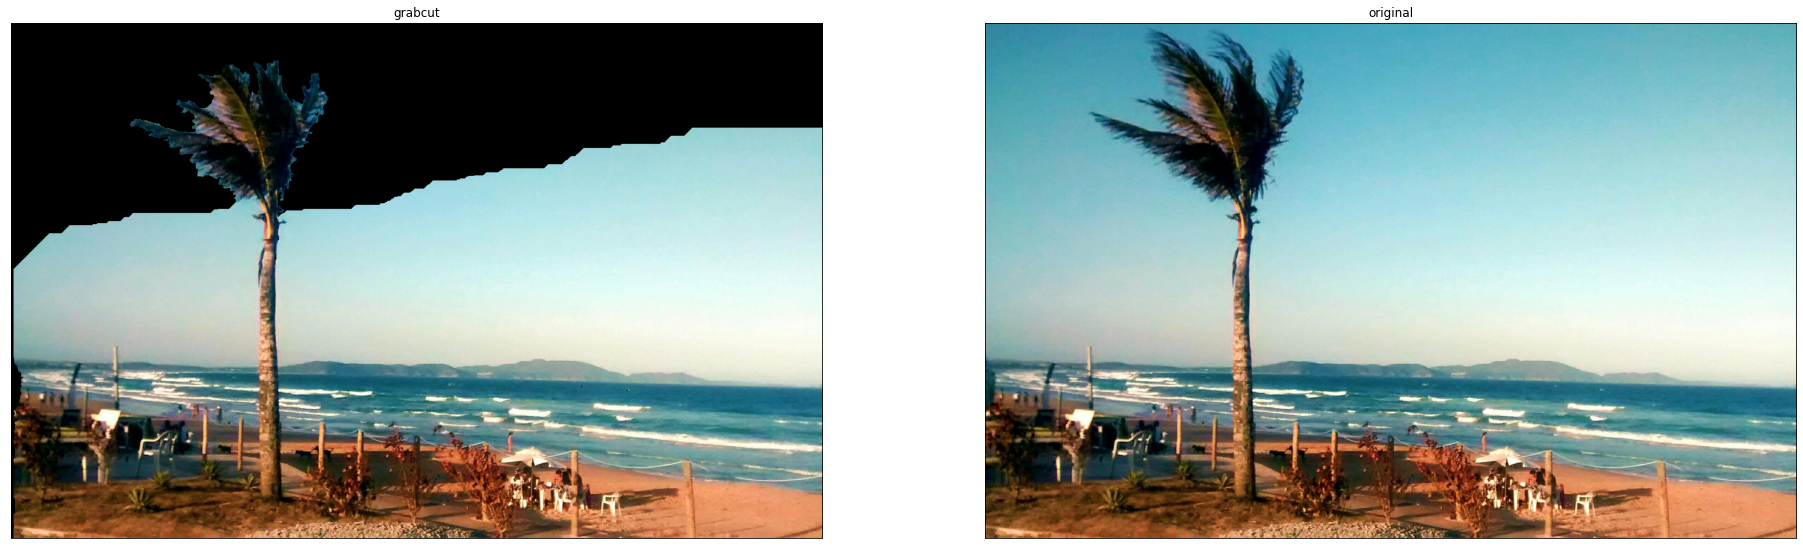

In [18]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

In [19]:
img = cv2.imread('landscape/00000002.jpg')
#reference = cv2.imread('Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_isp/691.jpg') 
out = simplest_cb(img, 1)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 250,500)
#canny2 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
#RGB_reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

(640000,)
640000
Lowval:  0
Highval:  255
(640000,)
640000
Lowval:  7
Highval:  255
(640000,)
640000
Lowval:  0
Highval:  255


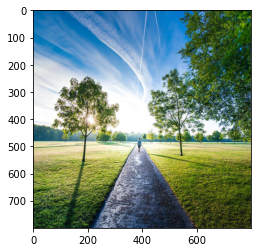

In [20]:
plt.imshow(RGB_img)

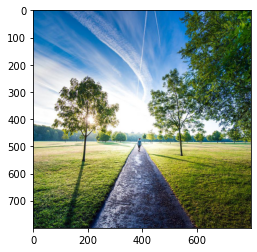

In [21]:
plt.imshow(RGB_out)

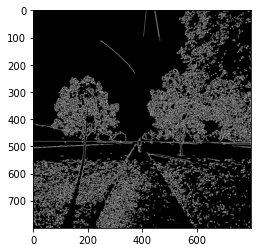

In [22]:
plt.imshow(canny, 'gray')